In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import PIL # image library in Python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

c:\Users\panla\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir=".", untar=True)

In [3]:
data_dir 

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count =len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [6]:
roses = list(data_dir.glob("roses/*"))
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

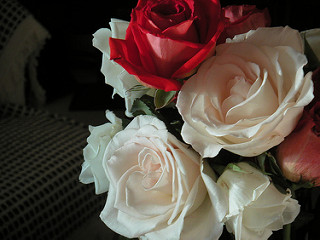

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
flowers_images_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*")),
}

In [9]:
flowers_labels_dict ={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4,
    
}

In [10]:
str(flowers_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [11]:
img =cv2.imread(str(flowers_images_dict["roses"][0]))

In [12]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [16]:
X=np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [18]:
print (len(X_train))
print("---------------------->")
print (len(X_test))

2752
---------------------->
918


In [19]:
X_train

array([[[[ 68,  79,  77],
         [ 63,  70,  63],
         [ 60,  62,  56],
         ...,
         [ 49,  40,  37],
         [ 48,  39,  36],
         [ 48,  39,  36]],

        [[ 57,  62,  60],
         [ 61,  64,  60],
         [ 60,  61,  55],
         ...,
         [ 48,  39,  36],
         [ 48,  39,  36],
         [ 50,  41,  38]],

        [[ 61,  58,  57],
         [ 64,  64,  59],
         [ 59,  59,  53],
         ...,
         [ 49,  40,  37],
         [ 49,  40,  37],
         [ 50,  41,  38]],

        ...,

        [[ 49, 121,  93],
         [ 40,  65,  51],
         [ 52,  96,  67],
         ...,
         [156, 216, 211],
         [161, 216, 212],
         [169, 203, 206]],

        [[ 48, 119,  90],
         [ 45,  58,  44],
         [ 50,  91,  60],
         ...,
         [217, 233, 238],
         [201, 212, 215],
         [185, 168, 175]],

        [[ 54, 121,  95],
         [ 46,  58,  46],
         [ 46,  89,  60],
         ...,
         [227, 245, 248],
        

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_scaled= X_train / 255
X_test_scaled= X_test / 255

In [21]:
num_classes = 5
y_train = np.array(y_train)

model = Sequential([
    #cnn
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    #dense
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)
    
])

model.compile(optimizer="adam",
              loss =keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [22]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.3085 - loss: 1.8107
Epoch 2/2
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.5864 - loss: 1.0384


In [23]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6035 - loss: 1.0386


[1.0198265314102173, 0.6111111044883728]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


array([[-0.58776605,  2.7288167 , -0.11401495, -2.2374806 , -0.49852663],
       [ 2.796584  , -1.4039677 , -3.9918463 , -1.2278721 ,  2.5355895 ],
       [-1.7748    ,  1.3045715 ,  1.6374261 , -1.5293617 , -1.4137591 ],
       ...,
       [-0.3480572 , -0.21443021, -1.1132216 ,  1.0477008 , -0.2820108 ],
       [ 0.85261303,  0.38761425,  0.00745092, -1.5626442 ,  0.88054687],
       [-0.8479219 , -1.8544346 , -1.0610908 ,  1.2092721 ,  0.8581688 ]],
      dtype=float32)

In [25]:
scores = tf.nn.softmax(predictions[0])
scores

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.03178898, 0.87629473, 0.05105333, 0.00610681, 0.03475624],
      dtype=float32)>

In [26]:
np.argmax(scores)

1

In [28]:
y_test[0]

1

In [32]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'c:\\Users\\panla\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


## Data Augmentation

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.preprocessing.RandomZoom(0.5),
])


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'preprocessing'

In [30]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5),
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

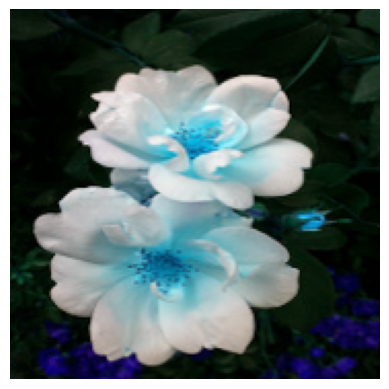

In [31]:
plt.axis("off")
plt.imshow(X[0])

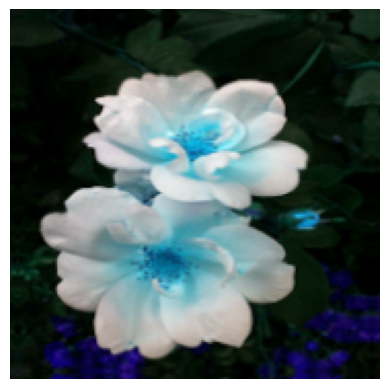

In [ ]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [ ]:
num_classes = 5
y_train = np.array(y_train)

model = Sequential([
    #cnn
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    
    #dense
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)
    
])

model.compile(optimizer="adam",
              loss =keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
86/86 [==============================] - 39s 376ms/step - loss: 1.3266 - accuracy: 0.4302
Epoch 2/2
86/86 [==============================] - 32s 367ms/step - loss: 1.0573 - accuracy: 0.5810


In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 81ms/step - loss: 0.9867 - accuracy: 0.6144


[0.9866552948951721, 0.6143791079521179]